# Thermodynamic derivatives tutorial

**Authors: Roberto Tejada Arevalo**

Please see the `eos_tutorial.ipynb` for an introduction to access the EOS module.

Each of the EOS modules contains necessary partial derivatives. However, these can also be directly accessed by `mixtures_eos.py`. 

The derivatives follow the same argument formatting as the variables; i.e., the specific heat at constant pressure is $C_p(\log_{10}{P}, \log_{10}{T}, y, z)$. Please see the read me file for all the derivatives and their respective arguments.

Let's once agian define a grid of pressures and constant entropy and helium mass fraction, at zero metallicity.

In [1]:
import numpy as np
from eos import mixtures_eos
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc('text', usetex=False)
plt.rc('font', family='serif',size=20)
plt.rc('axes', linewidth=1.25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20, direction='in')
plt.rc('ytick', labelsize=20, direction='in')
plt.rc('legend', fontsize=10)

plt.rc('xtick.major',size=10,pad=8)
plt.rc('xtick.minor',size=5,pad=8)
plt.rc('ytick.major',size=10)
plt.rc('ytick.minor',size=5)

You can call the specific heat at constant pressure:

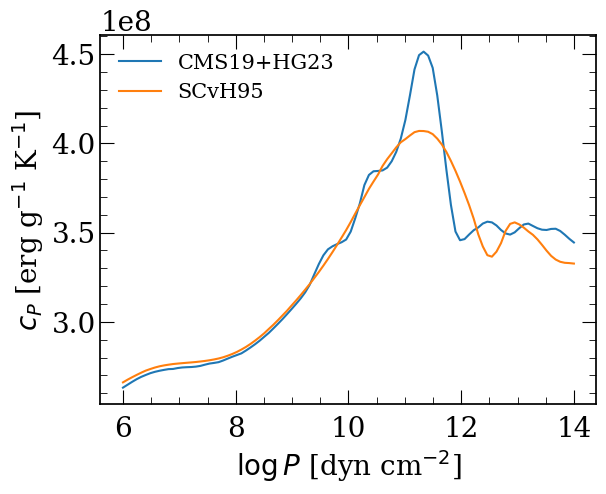

In [3]:
logpgrid = np.linspace(6, 14, 100)
s_const = np.full_like(logpgrid, 6.21) # defining a constant specific entropy at 6.21 kb/baryon (roughly equal to 7.07 kb/el-- See Hubbard & Militzer 2016)
y_const = np.full_like(logpgrid, 0.277) # roughly solar abundance

z_0 = np.zeros(len(logpgrid))
z_const = np.full_like(logpgrid, 0.06) # roughly three times solar abundance

# Call the specific heat at constant prssure

cp_cms = mixtures_eos.get_c_p(s_const, logpgrid, y_const, z_0, hhe_eos='cms')
cp_scvh = mixtures_eos.get_c_p(s_const, logpgrid, y_const, z_0, hhe_eos='scvh')

plt.plot(logpgrid, cp_cms, label='CMS19+HG23')
plt.plot(logpgrid, cp_scvh, label='SCvH95')
plt.xlabel(r'$\log{P}$ [dyn cm$^{-2}$]')
plt.ylabel(r'$c_P$ [erg g$^{-1}$ K$^{-1}$]')
plt.minorticks_on()
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.legend(frameon=False, prop={'size':15})
plt.show()

The variables for the specific heat at constant volume are density and entropy.

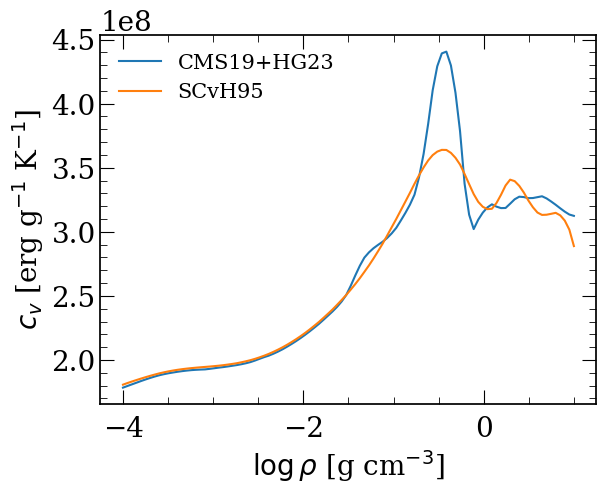

In [18]:
logrhogrid = np.linspace(-4, 1, 100) # density grid from 10^-4 g/cm^3 to 10 g/cm^3
s_const = np.full_like(logpgrid, 6.21)
y_const = np.full_like(logpgrid, 0.277) # roughly solar abundance

z_0 = np.zeros(len(logpgrid))
z_const = np.full_like(logpgrid, 0.06) # roughly three times solar abundance

# Call the specific heat at constant prssure

cv_cms = mixtures_eos.get_c_v(s_const, logrhogrid, y_const, z_0, hhe_eos='cms')
cv_scvh = mixtures_eos.get_c_v(s_const, logrhogrid, y_const, z_0, hhe_eos='scvh')

plt.plot(logrhogrid, cv_cms, label='CMS19+HG23')
plt.plot(logrhogrid, cv_scvh, label='SCvH95')
plt.xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
plt.ylabel(r'$c_v$ [erg g$^{-1}$ K$^{-1}$]')
plt.minorticks_on()
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.legend(frameon=False, prop={'size':15})
plt.show()

In a similar way, one can call $\nabla_a$

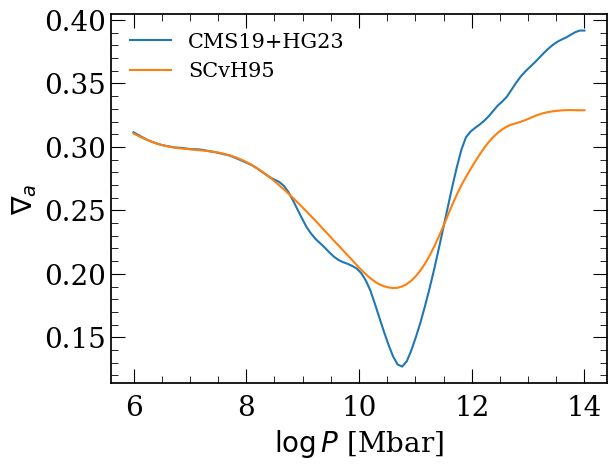

In [22]:
logpgrid = np.linspace(6, 14, 100)
s_const = np.full_like(logpgrid, 6.21) # defining a constant specific entropy at 6.21 kb/baryon (roughly equal to 7.07 kb/el-- See Hubbard & Militzer 2016)
y_const = np.full_like(logpgrid, 0.277) # roughly solar abundance

z_0 = np.zeros(len(logpgrid))
z_const = np.full_like(logpgrid, 0.06) # roughly three times solar abundance

# Call the specific heat at constant prssure

nabla_ad_cms = mixtures_eos.get_nabla_ad(s_const, logpgrid, y_const, z_0, hhe_eos='cms', dp=0.1)
nabla_ad_scvh = mixtures_eos.get_nabla_ad(s_const, logpgrid, y_const, z_0, hhe_eos='scvh', dp=0.1)

plt.plot(logpgrid, nabla_ad_cms, label='CMS19+HG23')
plt.plot(logpgrid, nabla_ad_scvh, label='SCvH95')
plt.xlabel(r'$\log{P}$ [Mbar]')
plt.ylabel(r'$\nabla_a$')
plt.minorticks_on()
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.legend(frameon=False, prop={'size':15})
plt.show()

**IMPORTANT**

One can control the finite-difference steps in these derivatives. In the plot above, I've chosen a step of $10\%$ along the pressure (the independent variable). You can chose `dp=0.01`, and other fractions.

# Derivatives for convection criteria

As outlined in our accompanying paper (Tejada Arevalo et al. 2024), the entropy and composition gradients are needed to determine stability against convection. 

The Schwarzchild condition for convective stability states that

$$ \frac{ds}{dr} - \frac{\partial s}{\partial Y}_{P, T} \frac{dY}{dr} > 0 $$

and the Ledoux condition states that

$$ \frac{ds}{dr} - \frac{\partial s}{\partial Y}_{\rho, P} \frac{dY}{dr} > 0 $$

where $r$ is the radius. Notice that the partial derivative is held constant at different thermodynamic variables. 

The partial derivative can be accessed by `mixtures_eos.py` or by the individual `cms_eos` file, and have different thermodynamic basis via `get_dsdy_pt(logp, logt, y, z)` and `get_dsdy_rhop(s, logrho, y, z)`.

In [23]:
from eos import cms_eos
import matplotlib as mpl

erg_to_kbbar = cms_eos.erg_to_kbbar

/var/folders/my/z6yrs37n32zd5krdnpzl8r440000gn/T/ipykernel_31350/3551844179.py:60: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(s_m).set_label('Specific Entropy [$k_b/$baryon]')


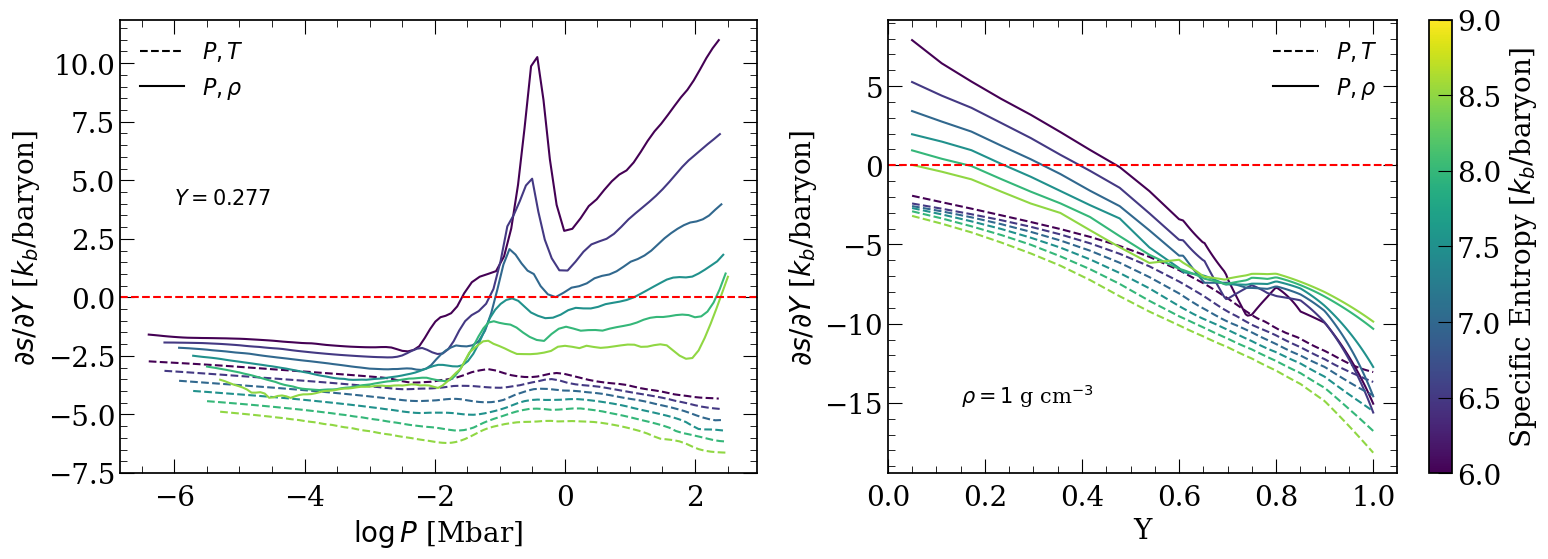

In [25]:
sgrid = np.arange(6.0, 9.0, 0.5)
logrhogrid = np.linspace(-4, 1.0, 100)
ygrid = np.zeros(len(logrhogrid))+0.277

dsdy_pt = []
dsdy_rhop = []

norm = mpl.colors.Normalize(
    vmin=np.min(sgrid),
    vmax=9.0)

# choose a colormap
c_m = mpl.cm.viridis

# create a ScalarMappable and initialize a data structure
s_m = mpl.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

fig = plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for i, s in enumerate(sgrid):
    s_val = np.full_like(logrhogrid, s)
    logp = cms_eos.get_p_srho_tab(s_val, logrhogrid, ygrid)
    logt = cms_eos.get_t_srho_tab(s_val, logrhogrid, ygrid)

    dsdy_pt_cms = cms_eos.get_dsdy_pt(logp, logt, ygrid)*erg_to_kbbar
    dsdy_rhop_cms = cms_eos.get_dsdy_rhop_srho(s_val, logrhogrid, ygrid, ds=0.1, dy=0.15)*erg_to_kbbar

    # dsdy_pt.append(dsdy_pt_cms)
    # dsdy_rhop.append(dsdy_rhop_cms)
    ax1.plot(logp-12, dsdy_rhop_cms, color=c_m(norm(s)))
    ax1.plot(logp-12, dsdy_pt_cms, color=c_m(norm(s)), ls='--')

ax1.plot(0,0, c='k', ls='--', label='$P, T$')
ax1.plot(0,0, c='k', ls='-', label=r'$P, \rho$')

ax2.plot(0,0, c='k', ls='--', label='$P, T$')
ax2.plot(0,0, c='k', ls='-', label=r'$P, \rho$')

ygrid = np.linspace(0.05, 0.6, 10)
ygrid = np.append(ygrid, np.linspace(0.6, 1.0, 100))
logrhogrid = np.zeros(len(ygrid))

for i, s in enumerate(sgrid):
    s_val = np.full_like(logrhogrid, s)
    logp = cms_eos.get_p_srho_tab(s_val, logrhogrid, ygrid)
    logt = cms_eos.get_t_srho_tab(s_val, logrhogrid, ygrid)

    dsdy_pt_cms = cms_eos.get_dsdy_pt(logp, logt, ygrid)*erg_to_kbbar
    dsdy_rhop_cms = cms_eos.get_dsdy_rhop_srho(s_val, logrhogrid, ygrid, ds=0.1, dy=0.15)*erg_to_kbbar

    # dsdy_pt.append(dsdy_pt_cms)
    # dsdy_rhop.append(dsdy_rhop_cms)
    ax2.plot(ygrid, dsdy_rhop_cms, color=c_m(norm(s)))
    ax2.plot(ygrid, dsdy_pt_cms, color=c_m(norm(s)), ls='--')

fig.colorbar(s_m).set_label('Specific Entropy [$k_b/$baryon]')
#ax1.set_xlim(5, 15)

ax1.set_ylabel(r'$\partial s/\partial Y$ [$k_b/$baryon]')
ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.axhline(y=0, ls='--', color='r')
ax1.legend(frameon=False, prop={'size':16})
ax1.text(-6.0, 4, '$Y = 0.277$', fontsize=15)
ax1.minorticks_on()
    
ax2.set_xlim(0, 1.05)
ax2.set_ylabel(r'$\partial s/\partial Y$ [$k_b/$baryon]')
ax2.set_xlabel('Y')
ax2.axhline(y=0, ls='--', color='r')
ax2.legend(frameon=False, prop={'size':16})
ax2.text(0.15, -15, r'$\rho = 1$ g cm$^{-3}$', fontsize=15)
ax2.minorticks_on()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

# ax1.set_aspect('equal')
# ax2.set_aspect('equal')
plt.tight_layout()

#plt.savefig('figures/fig7_cbar_ent.pdf', bbox_inches='tight')

plt.show()

Here, we show the different derivatives at constnat pressure and temperature and pressure and density. Values above the red line indicate a sign change in the Ledoux condition (solid lines).

# Derivative for energy equation

The thermodynamic energy equation can be given by the first law of thermodynamics. If rendered in the independent thermodynamic basis variables ($s,\ \rho = \frac{1}{V},\ N_j$), this yields


$$ dU + PdV = Tds + \sum^n_{j=1} \mu_j dN_j $$

for $n$ chemical components. It is the left-hand-side of this equation that appears in the energy equation in stellar/planetary evolution and that is related to the energy sources, sinks, and the divergence of the energy flux. If the thermodynamic basis variables are ($\rho,\ T,\ N_j$), then a knowledge of $U(\rho,\ T,\ N_j)$ allows one to eschew explicit mention of $s$.  

However, if we employ the entropy formulation and include only the dependence upon $Y$ (the helium mass fraction), the specific energy (energy per mass) can be written as 


$$ du + Pd\bigg(\frac{1}{\rho}\bigg) = Tds + \mu_Y dY\, $$

We note that $\mu_Y$ is not the helium chemical potential but the weighted sum emerging from the right-hand side of Eq. \ref{energy}. This can be easily expanded to include metals ($Z$) specifically by adding a $\mu_z dZ$ term, but is in fact already implicit in Eq. \ref{energy}. The composition then is included in the energy update when using entropy as an independent variable for a given evolutionary calculation step. Following Eq. \ref{energy}, the term $\mu_Y$ for the hydrogen-helium mixture is

$$ \mu_Y = \frac{\partial u}{\partial Y}_{s, \rho}. $$

This derivative can be accessed directly by calling the EOS modules as before via `get_dudy_srho(s, logrho, y, z)`.



/var/folders/my/z6yrs37n32zd5krdnpzl8r440000gn/T/ipykernel_31350/3927699047.py:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(s_m).set_label('Specific Entropy [$k_b/$baryon]')


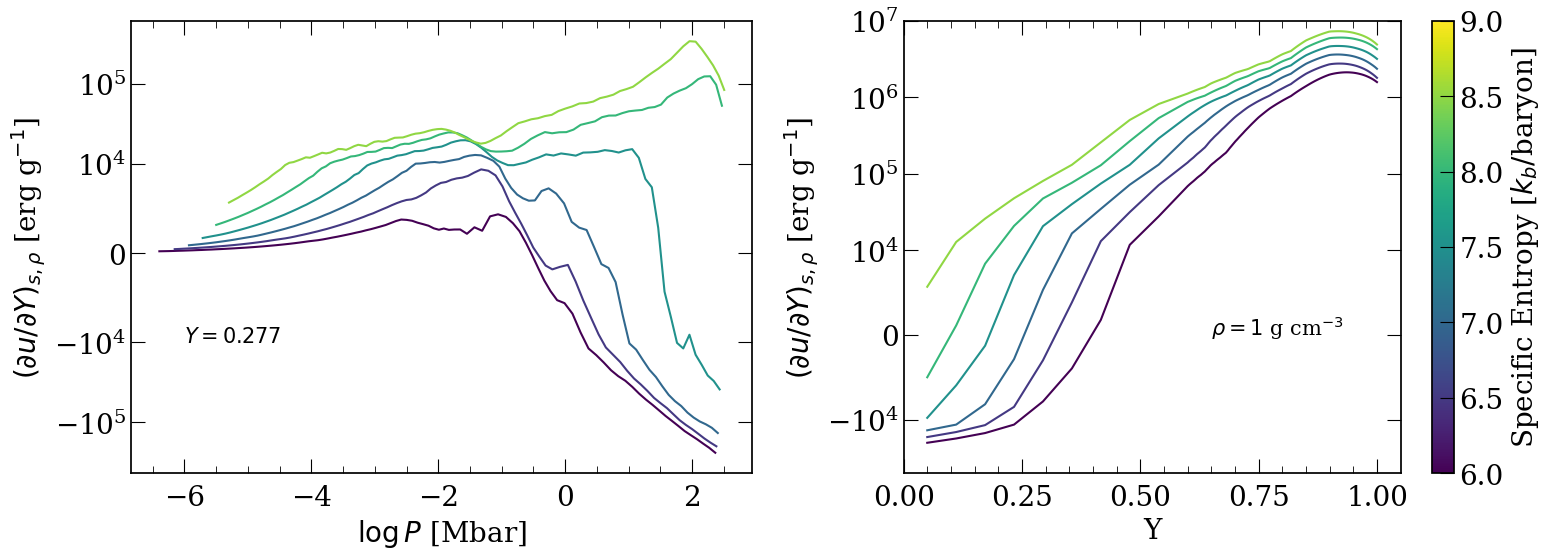

In [26]:
sgrid = np.arange(6.0, 9.0, 0.5)
logrhogrid = np.linspace(-4, 1.0, 100)
ygrid = np.zeros(len(logrhogrid))+0.277

dsdy_pt = []
dsdy_rhop = []

norm = mpl.colors.Normalize(
    vmin=np.min(sgrid),
    vmax=9.0)

# choose a colormap
c_m = mpl.cm.viridis

# create a ScalarMappable and initialize a data structure
s_m = mpl.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

fig = plt.figure(figsize=(16, 6))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for i, s in enumerate(sgrid):
    s_val = np.full_like(logrhogrid, s)
    logp = cms_eos.get_p_srho_tab(s_val, logrhogrid, ygrid)
    logt = cms_eos.get_t_srho_tab(s_val, logrhogrid, ygrid)

    dudy_srho_cms = cms_eos.get_dudy_srho(s_val, logrhogrid, ygrid)*erg_to_kbbar
    ax1.plot(logp-12, dudy_srho_cms, color=c_m(norm(s)))

ygrid = np.linspace(0.05, 0.6, 10)
ygrid = np.append(ygrid, np.linspace(0.6, 1.0, 100))
logrhogrid = np.zeros(len(ygrid))

for i, s in enumerate(sgrid):
    s_val = np.full_like(logrhogrid, s)
    logp = cms_eos.get_p_srho_tab(s_val, logrhogrid, ygrid)
    logt = cms_eos.get_t_srho_tab(s_val, logrhogrid, ygrid)

    dudy_srho_cms = cms_eos.get_dudy_srho(s_val, logrhogrid, ygrid)*erg_to_kbbar
    ax2.plot(ygrid, dudy_srho_cms, color=c_m(norm(s)))

fig.colorbar(s_m).set_label('Specific Entropy [$k_b/$baryon]')

ax1.set_ylabel(r'$(\partial u/\partial Y)_{s, \rho}$ [erg g$^{-1}$]')
ax1.set_xlabel('$\log{P}$ [Mbar]')
ax1.text(-6.0, -1e4, '$Y = 0.277$', fontsize=15)
ax1.minorticks_on()
    
ax2.set_xlim(0, 1.05)
ax2.set_ylabel(r'$(\partial u/\partial Y)_{s, \rho}$ [erg g$^{-1}$]')
ax2.set_xlabel('Y')
ax2.text(0.65, 0, r'$\rho = 1$ g cm$^{-3}$', fontsize=15)
ax2.minorticks_on()

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax1.set_yscale('symlog', linthresh=1e4)
ax2.set_yscale('symlog', linthresh=1e4)
ax2.set_ylim(-5e4, 1e7)
plt.tight_layout()

plt.show()

A full account of this derivative is necessary for energy conservation.